# Non-linear Dimensionality Reduction


Contents
------

* [**Introduction:**]()

* [**Unified Framework for Dimensionality Reduction :**]()
 

* [**Multidimensional Scaling**]()
   
    
* [**ISOMAP**]()
    - Geodesic distances and the isometric mapping algorithm
    - Implementation details and application 

* [**Local Linear Embedding**]()
    - Locally linear reconstructions and optimization problems
    - Example applications with image data
    
* [**Laplacian Eigenmaps/Spectral Embedding**]()
  

# [**Introduction:**]()

Methods of dimensionality reduction provide a way to understand and visualize the structure of complex data sets. Traditional methods like principal component analysis and classical metric multidimensional scaling suffer from being based on linear models. Until recently, very few methods were able to reduce the data dimensionality in a nonlinear way. However, since the late nineties, many new methods have been developed and nonlinear dimensionality reduction, also called manifold learning, has become a hot topic. New advances that account for this rapid growth are, e.g. the use of graphs to represent the manifold topology, and the use of new metrics like the geodesic distance. In addition, new optimization schemes, based on kernel techniques and spectral decomposition, have lead to spectral embedding, which encompasses many of the recently developed methods.

# [**Unified Framework for Dimensionality Reduction :**]()

# [**Multidimensional Scaling**]()

### Algorithm Outline (Classical MDS): 
**Input:** Pairwise distances/dissimilarities for n objects given by matrix $D \in \mathbb{R}^{n \times n}$ with entries $d_{ij}$, with one parameter k (specified output dimension)<br>
**Output:** Configuration vectors $x_1, ..., x_n \in \mathbb{R}^k$
<br>
**Steps**: <br>
1. Compute Gram matrix & double centering: from the pairwise dissimilarity matrix find Gram matrix $B \in \mathbb{R}^{n \times n}$ where we double center with $B = \frac{-1}{2} C_n D^{2} C_{n}$<br>
2. Find eigenvalues and eigenvectors: Find eigenvalues $\lambda$ and eigenvectors $\mathbf{v}$ of Gram matrix and form matrices $\mathbf{\Lambda}_{n}=\operatorname{diag}\left(\lambda_{1}, \ldots, \lambda_{n}\right)$ and $\boldsymbol{V}_{n}=\left(\boldsymbol{v}_{1}, \ldots, \boldsymbol{v}_{n}\right)$
3. Lower dimensional embedding:  use the top k eigenvectors $v_1, ..., v_k$ (with the largest eigenvalues) and decomposition $X = V_{k} \sqrt{\Lambda}_{k} $ to form matrix $X = (x_1, \ldots, x_n)^{T}$ with lower dimensional output vectors $x_i \in \mathbb{R}^k$

**Classical MDS:** When the original distances are Euclidean, we use classical multidimensional scaling and we try to find a configuration so that the configured distances are approximately equal to the original Euclidean distances.

## Step 1: Double Centering and the Gram Matrix

To find the matrix $X$ with the output coordinates, we use the fact that the $n\times n$ Gram matrix $B$ will be defined by the inner products of $X$. <br>
<br>
$$\underbrace{\mathbf{B}}_{n\times n} = \underbrace{\mathbf{X}}_{n\times k} \cdot \underbrace{\mathbf{X}^T}_{k\times n}$$ <br>
Which we write out explicitly as <br>
<br>
$$\mathbf{B} = \mathbf{X X^T} = \begin{bmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,k} \\
x_{2,1} & x_{2,2} & \cdots & x_{2,k} \\
\vdots & \vdots & \vdots & \vdots \\
x_{n,1} & x_{n,2} & \cdots & x_{n,k}
\end{bmatrix} 
\begin{bmatrix}
x_{1,1} & x_{2,1} & \cdots & x_{n,1} \\
x_{1,2} & x_{2,2} & \cdots & x_{n,2} \\
\vdots & \vdots & \vdots & \vdots \\
x_{1,k} & x_{2,k} & \cdots & x_{n,k}
\end{bmatrix}$$ <br>
<br>
The entries of $B$ are given by $b_{ij} = \langle x_i , x_j \rangle = \sum_{k} x_{ik} x_{jk}$. The expression of the gram matrix involving output configuration $X$ is only shown here to illustrate that once we compute the gram matrix, we can then derive the output vectors. However, we will obviously have to use our only input, the dissimilarity matrix, in order to find the gram matrix $B$. 

**Important detail/constraint**: The configuration of our solution will not be unique, as arbitrary translations, rotations, and reflections will not affect the pairwise distances. For example, if we have the solution as matrix $X = [x_1, \ldots, x_n]^{T}$, then we also have the solution $X^* = [x_1 + c, \ldots, x_n + c]^{T}$, translated by some vector $c \in \mathbb{R}^k$: <br>
<br>
$$
\begin{equation}
\begin{aligned}
d_{ij}^2 & \approx ||x_{i} - x_{j}||^2 & \text{since X is a solution}\\
\\
            & = ||(x_{i} + c) - (x_{j} + c)||^2\\
\\
            & = ||x^*_{i} - x^*_{j}||^2\\
\end{aligned}
\end{equation}
$$

Therefore, we must also have $d_{ij}^2 \approx ||x^*_{i} - x^*_{j}||^2$. <br>
<br>
The configurations that result from an arbitrary translation will all be solutions, and similar arguments can show that the pairwise distances will also be unaffected by rotations and reflections. Intuitively, the reasoning is that the distances are only defined pairwise, and not in terms of a global coordinate system.

### Double Centering

To incorporate the translational invariance, we need to center the gram matrix around 0 by subtracting the column and row means from every entry. Double centering is a technique that uses the centering matrix $C_n$: <br>
<br>
$$C_{n} = I_{n} - \frac{1}{n} \mathbf{1}\mathbf{1^T}$$ <br>
where $I_{n}$ is the Identity matrix for dimension $n$, $\mathbf{1}$ is a column vector of n ones, and $\mathbf{1}\mathbf{1^T}$ gives the $n\times n$ matrix of all ones.

For example, $$C_{2} = \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix} - \frac{1}{2} \begin{bmatrix}
1 & 1 \\
1 & 1
\end{bmatrix} = \begin{bmatrix}
1/2 & -1/2 \\
-1/2 & 1/2
\end{bmatrix} $$

For some matrix $X \in \mathbb{R}^{n \times n}$: $C_{n} X$ subtracts the column means from the entries of $X$, and $X C_{n}$ subtracts the row means from every entry of $X$. Hence, the operation $C_{n}X C_{n}$ removes both row and column means and is referred to as double centering.

**Closed Form of the Gram Matrix with Centering:** <br>
<br>
We can now succinctly state the closed matrix form of $B$ by making use of the centering matrix:
<br>
<br>
$$\boxed {B = \frac{-1}{2} C_n D^{2} C_{n}}$$ <br>
**Note:** $C_n$ is the centering matrix with $C_{n} = I_{n} - \frac{1}{n} \mathbf{1}\mathbf{1^T}$ and from the original distance matrix we have $D^{2}$ = matrix with entries ${d_{ij}^2}$

## Step 2: Find eigenvalues and eigenvectors of matrix B

Since the gram matrix $B$ is a real symmetric, positive definite matrix, we know that it will have real eigenvalues and we can use the following eigendecomposition of B in order to find an expression for our output configuration: <br>
<br>
$$
\begin{aligned}
B & = V \Lambda V^T\\
            & = {(\Lambda^\frac{1}{2} V^{T})}^T (\Lambda^\frac{1}{2} V^{T})\\
            & = X X^T & \text{(from original def. of B)}\\
\end{aligned}
$$<br>
and therefore we have
<br>
$$X = V \sqrt{\Lambda}$$ <br>
where the eigenvalues are given by diagonal matrix $\mathbf{\Lambda}=\operatorname{diag}\left(\lambda_{1}, \ldots, \lambda_{n}\right)$ and the eigenvectors are given by the following matrix with the columns set as the eigenvectors $V=\left(v_{1}, \ldots, v_{n}\right)^{T}$

## Step 3: Find coordinates of output configuration

We can now define a k-dimensional configuration by choosing the largest k eigenvalues and the corresponding eigenvectors from k columns of V: <br>
<br>
$$ \boxed{X_{k} = V_{k} \sqrt{\Lambda_{k}}}$$

where $\Lambda_{k}$ is the k x k diagonal submatrix of $\Lambda$ and $V_{k}$ is the n x k submatrix of $V$.

## Classical MDS and equivalence to PCA

Without going into the full details of Principal Component Analysis, I'll attempt to show that Classical MDS with Euclidean distances produces the same results as PCA. 

In the standard PCA approach, we have an input data matrix $X$ and (after centering the data) we find the singular value decomposition of $X$: <br>
<br>
$$
\mathbf{X}=\mathbf{U \Sigma W}^{T}
$$ <br>
where $\Sigma$ is a diagonal matrix with singular values $\sigma_{(k)}$, and matrices $U, W$ are orthogonal matrices s.t $\mathbf{W}^{T} \mathbf{W}=\mathbf{I} = \mathbf{U}^{T} \mathbf{U}$ <br>

The output $Y_k$ is produced by projecting the data onto the first $k$ principal components by multiplying $X$ and the first $k$ columns of $W$: <br>
<br>
$$\begin{aligned} \mathbf{Y_k} &= \mathbf{X} \mathbf{W_k} \\
&= \mathbf{U_k \Sigma_k W_k^{T} W_k} \\
&= \mathbf{U_k} \Sigma_k & (\text{since we have  } \mathbf{W}^{T} \mathbf{W}=\mathbf{I})\\
\end{aligned}
$$
<br>
To see the equivalence between PCA and classical MDS, consider our previous eigenvector decomposition of $X X^T$ from classical MDS. We now show that these left singular values $U_k$ are equivalent to the eigenvectors of $X X^T$, and that the singular values $\sigma_{(k)}$ of $\mathbf{X}$ are equivalent to the square root of the eigenvalues of $X X^T$. We rewrite $X X^T$ using the SVD: <br>
<br>

$$\begin{aligned} \mathbf{X} \mathbf{X}^{T} &=(\mathbf{U} \boldsymbol{\Sigma} \mathbf{W}^{T}) (\mathbf{W} \boldsymbol{\Sigma}^{T} \mathbf{U}^{T}) \\ 
&=\mathbf{U} \boldsymbol{\Sigma} \mathbf{\Sigma}^{T} \mathbf{U}^{T} & (\text{since we have  } \mathbf{W}^{T} \mathbf{W}=\mathbf{I}) \\
&= (\mathbf{U} \mathbf{\Sigma}) (\mathbf{\Sigma} \mathbf{U}^{T}) \\ 
&= V \Lambda V^T & \text{(eigendecomposition above)} \\ 
&= (V_{k} \sqrt{\Lambda_{k}}) (\sqrt{\Lambda_{k}} V^{T})\\
\end{aligned}$$ <br>

Therefore, we have: <br>
$$ \mathbf{U_k} \Sigma_k = V_{k} \sqrt{\Lambda_{k}}$$ <br>
and so finding the eigenvalue decomposition of the Gram matrix above (classical MDS) produces the same results as using the singular value decomposition and projecting onto the principal components (PCA).

## Metric vs. Non-metric MDS
There are many different variants of MDS that can be applied in different situations, and so the broad categories are only briefly covered below.

**Metric MDS** - dissimilarities are quantitative but not necessarily Euclidean (classical MDS is a special case)

For metric MDS, we have loss function defined as: <br>
<br>
$$Stress_{D}\left(x_{1}, x_{2}, \ldots, x_{N}\right)=\left(\sum_{i \neq j=1, \ldots, N}\left(d_{i j}-\left\|x_{i}-x_{j}\right\|\right)^{2}\right)^{1 / 2}
$$ <br>
We attempt to find the configuration $x_1, ..., x_n$ to minimize this error given our input matrix $D$

**Non-metric MDS** - dissimilarities are qualitative (similarity measures are interpreted more as rankings or ordinal classifications) <br>

In the non-metric case, the dissimilarity matrix we are given is only important in its relative ranking of the observations, not the quantitative degree to which observations differ. For non-metric MDS, we have a monotonic function $f$ and we find a configuration that *only preserves relative ranking of the data*. <br>
<br>
If $d_{ij} < d_{ik}, \Rightarrow f(d_{ij}) \leq f(d_{ik})$

Non-metric MDS can also be stated as the problem of finding the optimal configuration $x_1, ..., x_n \in \mathbb{R}^k$ that minimizes the following loss function: <br>
<br>
$$
Stress_{D}\left(x_{1}, x_{2}, \ldots, x_{N}\right)=\sqrt{\frac{\sum(f(x)-d)^{2}}{\sum d^{2}}}
$$

### <font color='blue'> Example - MDS and Non-linear Embeddings </font>

We use `sklearn.datasets` to generate a non-linear dataset that is often used to test manifold learning algorithms, and we use `sklearn.manifold` to apply MDS and visualize the resulting embedding.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plotting style
%matplotlib inline
plt.style.use('seaborn')
# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";
# ignore warnings
import warnings
warnings.filterwarnings('ignore');

N = 100 # number of data points
u = 3 + np.random.randn(N) # first feature dimension with mean = 3
v = 7 + np.random.randn(N) # second feature dimensions with mean = 7
X = np.hstack((u.reshape(-1,1),v.reshape(-1,1))) # 100 x 2 data matrix
# view first 5 rows and the column means
X[:5,:]
print('Column 1 mean: ', np.mean(X[:, 0]))
print('Column 2 mean: ', np.mean(X[:, 1]))

Column 1 mean:  3.175561353737653
Column 2 mean:  6.909117101390873


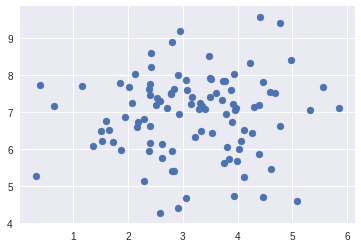

In [2]:
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.jet)
plt.show();

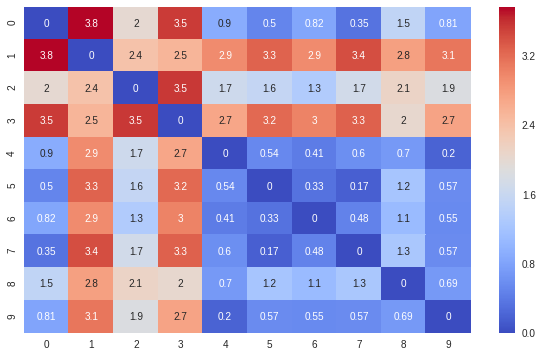

In [3]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
plt.figure(figsize=(10,6))
sns.heatmap(D[:10, :10], cmap="coolwarm", annot=True);

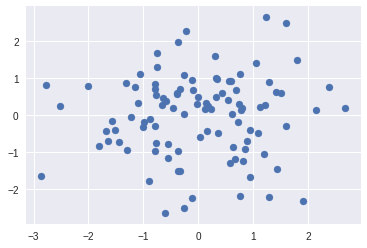

In [4]:
# function to form centering matrix
centering_matrix = lambda n: np.identity(n) -(1/n)*np.ones((n,n))
# multiply by data matrix X
X_centered = np.dot(centering_matrix(100), X)
# plot the centered data:
plt.scatter(X_centered[:, 0], X_centered[:, 1], cmap=plt.cm.jet)
plt.show();

In [5]:
# verify that the pairwise distances are unchanged
D_centered = pairwise_distances(X_centered)
np.allclose(D, D_centered)

True

## example 

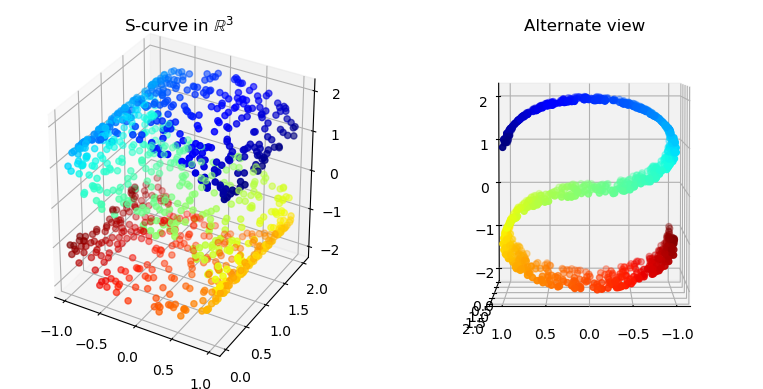

In [6]:
from sklearn.datasets.samples_generator import make_s_curve
from mpl_toolkits import mplot3d
X, color = make_s_curve(1000, random_state=0)
plt.style.use('default')
#plt.rcParams['figure.facecolor'] = 'white'

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.jet);
plt.title('S-curve in $\mathbb{R}^3$')

# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
plt.title('Alternate view')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.jet)
ax.view_init(4,90);

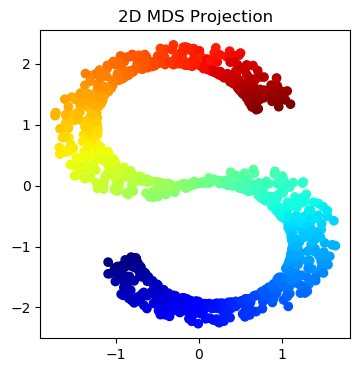

In [7]:
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2)
out = model.fit_transform(X)
fig = plt.figure(figsize=(4,4))
plt.scatter(out[:, 0], out[:, 1], c=color, cmap=plt.cm.jet)
plt.title('2D MDS Projection')
plt.show();

Multidimensional scaling is unable to accurately reproduce the non-linear, manifold structure of the S-curve and instead seemingly just produces a linear projection onto a plane. The reason MDS is generally unable to learn non-linear embeddings is that MDS attempts to preserve global distances based on an ambient or extrinsic coordinate system instead of learning the intrinsic structure by only considering local neighborhoods. <br>
<br>
The local neighborhood approach is used by the Isomap, Locally Linear Embedding, and Spectral Embedding algorithms that I cover in the subsequent sections, and fitting locally instead of globally produces much better non-linear embeddings.

# [**ISOMAP**]()

### Algorithm Outline (Isomap): 
**Input:** Data vectors $\mathbf{x_1}, ..., \mathbf{x_n} \in \mathbb{R^d}$ with parameters k (nearest neighbors) and m (embedding dimension)<br>
**Output:** Lower dimensional embedding vectors $\mathbf{y_i}, ..., \mathbf{y_n} \in \mathbb{R^m}$ with $m < d$
<br>
**Steps**: <br>
1. Find the k nearest neighbors for each point and create nearest neighbors graph $G$ with data points $x_i$ as the nodes and edges connecting nearest neighbors. <br>
2. Compute geodesic similarity matrix $D$ with pairwise shortest-path distances along the graph (Dijkstra's algorithm) <br>
3. Apply Multidimensional Scaling to matrix $D$ to form the lower dimensional embedding

### Step 1. kNN graph 

After computing the pairwise distances in the Euclidean space we find the k nearest neighbors for each data point. (either with the $\epsilon$-ball method where you only include neighbors within some $\epsilon$ radius or by just including the k nearest Euclidean distances)


Next, define the graph $$G = ({V, E)}$$ <br>
Let every data point $x_i$ be a node $v \in V$ with edges $e_{i,j}$ connecting every pair $x_i$, $x_j$. Given data points $x_i$, $x_j$ define the corresponding edge weights by: <br>
<br>
$$
\ w_{i,j} = \begin{cases} 
      d(x_i,x_j) & x_j \ \text{is a nearest neighbor of $x_i$} \\
      \infty & otherwise \\ 
   \end{cases}
\\ $$ <br>
This has the effect of essentially only connecting nearest neighbors with edges, since the edge weights are set to $\infty$ otherwise, indicating an infinite graph distance between them. We do this, however, in order to make the kNN graph connected and ensure it satisfies the conditions of the graph algorithms we use.

## Step 2. Shortest Path Algorithms and Pairwise Graph Geodesics

![title](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/Shortest_path_with_direct_weights.svg/375px-Shortest_path_with_direct_weights.svg.png)

The shortest path from A to F in this figure is given by the path A-C-E-D-F. Source: https://en.wikipedia.org/wiki/Shortest_path_problem

Although this image shows a directed graph and our nearest neighbors graph will be undirected, this figure demonstrates how distances and shortest path geodesics along the graph are computed. The shortest path from some node A to node B is the path that minimizes the weighted sum of the edges in the path.  <br>

We have two prominent algorithms for finding the shortest or minimum weight path between two nodes in a graph: <br>
- Dijkstra's Algorithm <br>
- The Floyd-Warshall Algorithm

## Step 3. Applying Multidimensional Scaling

We now have our pairwise geodesic distance matrix D which we can input to MDS. We use the squared geodesic distances $D^{2}$ to calculate the gram matrix $B$ <br>
<br>
$$\boxed {B = \frac{-1}{2} C_n D^{2} C_{n}^T}$$ <br>
**Note:** $C_{n}$ = Centering matrix, $D^{2}$ = matrix with entries ${d_{ij}^2}$

We can now use the eigendecomposition of B: <br>
<br>
$$B = Y Y^T = V \Lambda V^T$$ <br>
using the fact that $B$ is symmetric, positive definite n x n matrix we have <br>
<br>
$$ \boxed{Y = \Lambda^\frac{1}{2} V^T}$$ 

We can reduce the dimensionality to $m \leq d$: <br>
<br>
$$ \boxed{Y_{m} = \Lambda_{m}^\frac{1}{2} V_{m}^T}$$
<br>
by choosing the first m columns of eigenvector matrix V where $\Lambda_{m}$ is the m x m diagonal submatrix with the m largest eigenvalues. 

We have our lower dimensional output vectors $\mathbf{y_i}, ..., \mathbf{y_n} \in \mathbb{R^m}$. We used the knn graph to calculate geodesic distances, and applied MDS to preserve these geodesic distances, such that we retain information about the manifold structure while reducing the dimensionality.

### <font color='blue'> Example - More on Geodesics and the kNN Graph</font> 

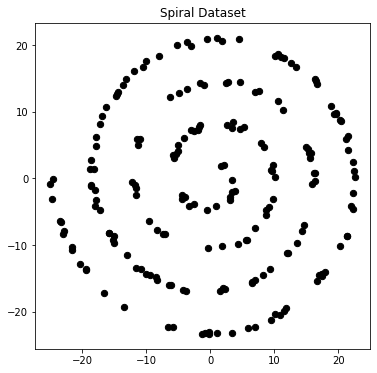

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(6,6))
# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";
np.random.seed(8888)

# spiral dataset
n = np.sqrt(np.random.rand(200,1)) * 1440 * (2*np.pi)/360
d1x = -np.cos(n)*n + np.random.rand(200,1) * 0.8
d1y = np.sin(n)*n + np.random.rand(200,1) * 0.8

plt.scatter(d1x, d1y, c = 'black', s=40)
plt.title('Spiral Dataset')
X = np.hstack((d1x,d1y));

This is a very simple non-linear manifold. The data here approximately lies along this embedded curved in $\mathbb{R^2}$, and looks locally linear. Now we find the k nearest neighbors and draw edges connecting them on the graph. Note that we find these original nearest neighbors by the Euclidean distance in this original space.

In [9]:
# compute pairwise distance matrix to find k nearest neighbors for each x_i in X
from sklearn.metrics import pairwise_distances
dist_matrix = pairwise_distances(X)
dist_matrix.shape

# function that outputs N x k matrix with k nearest neighbors for each observation in X
def nearest_neighbors(X, k):
    # we use k+1 here since Xi will have the shortest distance to itself
    knn_matrix = np.zeros((len(X), k))
    # compute pairwise distances
    dist_matrix = pairwise_distances(X)
    # for each row find indices of k nearest neighbors
    for i in range(len(X)):
        knn_matrix[i] = dist_matrix[i,:].argsort()[1:k+1]
    return knn_matrix

(200, 200)

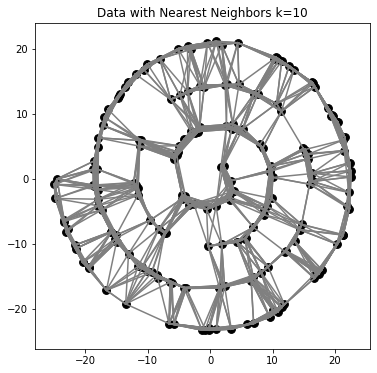

In [10]:
# set number of neighbors and find neighborhood matrix
k = 10
X_neighbors = nearest_neighbors(X, k)

# loop through each data point and draw lines to nearest neighbors
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], alpha=0.3, c='black', s=50);

for i in range(len(X)):
    neighbors = X_neighbors[i]
    for j in range(len(neighbors)):
        plt.plot(X[[i, neighbors.astype('int')[j]], 0], X[[i, neighbors.astype('int')[j]], 1], c='gray')

plt.title('Data with Nearest Neighbors k=' + str(k))
plt.scatter(X[:,0], X[:,1], c='black', s=60);

Now let's look at one region to see how the geodesic distances might better describe the manifold structure than Euclidean distances.

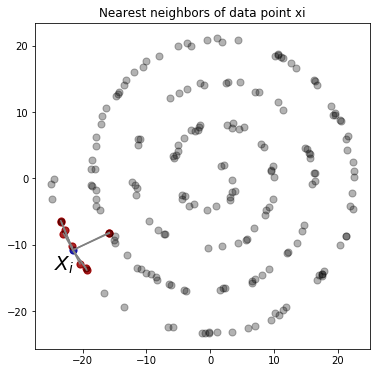

In [11]:
# neighbors for a given xi (first element in X)
neighbors = X_neighbors[0] # indices of neighbors
plt.figure(figsize=(6,6))
plt.scatter(X[0, 0], X[0, 1], c='blue', s=50, alpha=0.8)
plt.text(X[0, 0]-3, X[0, 1] - 3, s='$X_i$', size=20)
plt.scatter(X[neighbors.astype('int'), 0], X[neighbors.astype('int'), 1], c='red', alpha = 0.8, s=50)
for i in range(len(neighbors)):
    plt.plot(X[[0, neighbors.astype('int')[i]], 0], X[[0, neighbors.astype('int')[i]], 1], c='gray')
plt.scatter(X[:,0], X[:,1], alpha=0.3, c='black', s=50)
plt.title('Nearest neighbors of data point xi');

In [12]:
# get coordinates for the neighborhood of xi
xi_nn = []
for i in range(len(neighbors)):
    xi_nn.append(X[neighbors.astype('int')[i]])
xi_nn = np.array(xi_nn)

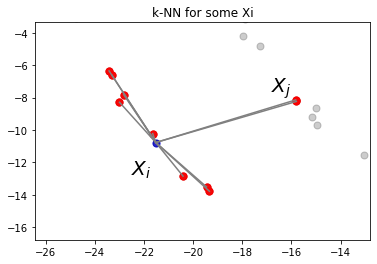

In [13]:
# zoom in on xi with nearest neighbor edges
j = k-1
plt.scatter(X[0, 0], X[0, 1], c='blue', s=50, alpha=0.8)
plt.text(X[0, 0] - 1, X[0, 1] - 2, s='$X_i$', size=20)
plt.text(xi_nn[j][0]-1.0, xi_nn[j][1] + 0.5, s='$X_j$', size=20)
plt.scatter(X[neighbors.astype('int'), 0], X[neighbors.astype('int'), 1], c='red', alpha = 0.8, s=50)
for i in range(len(neighbors)):
    plt.plot(X[[0, neighbors.astype('int')[i]], 0], X[[0, neighbors.astype('int')[i]], 1], c='gray')
plt.scatter(X[:,0], X[:,1], alpha=0.2, c='black', s=50);
plt.scatter(X[neighbors.astype('int'), 0], X[neighbors.astype('int'), 1], c='red', alpha = 0.8, s=50)
plt.title('k-NN for some Xi')
plt.xlim(np.min(xi_nn[:,0])-3,np.max(xi_nn[:,0])+3)
plt.ylim(np.min(xi_nn[:,1]-3),np.max(xi_nn[:,1])+3);

In this case the Euclidean distances give us nearest neighbors that don't necessary provide the nearest neighbors along the manifold. $x_i$ and $x_j$ are close in the 2D Euclidean space, but if you think about only being able to move along the spiral ring manifold then $x_j$ would be further than many other candidate neighbors for $x_i$.<br>
<br>
Using geodesic distances with Isomap helps us uncover this manifold structure, as opposed to using only Euclidean distances (like MDS). Euclidean distances can often fail because of this "short-circuit" problem, where points can be close in the larger external space but far away on the non-linear manifold. <br>
<br>
Additionally, experimenting with different values of k can improve the performance of Isomap here by not allowing too many 'jumps' through the external Euclidean space.

### <font color='blue'> Example - Graph Geodesics on the Swiss Roll</font>

We now show an example of this k-NN graph and the graph geodesic distances on our favorite dataset for manifold learning: the swiss roll.

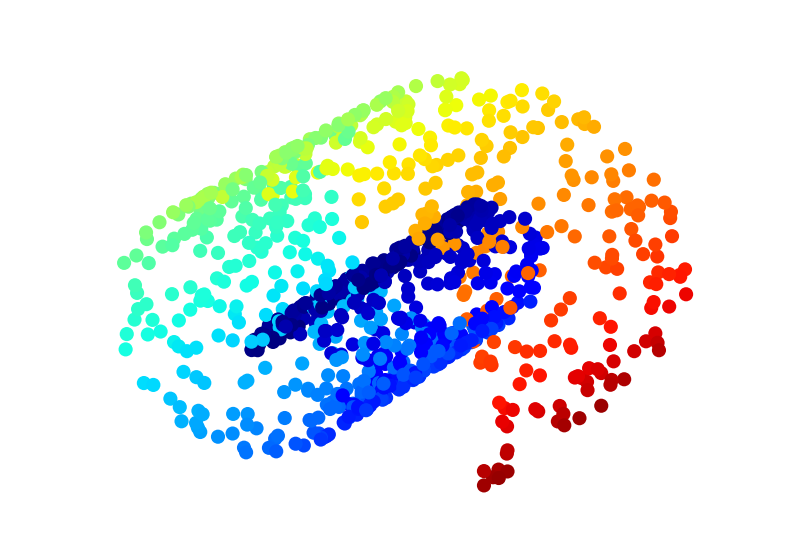

In [14]:
# generate data
n = 1000
x = np.random.rand(2,n)

# swiss roll transformation
v = 3*np.pi/2*(.1 + 2*x[0,:])
X  = np.zeros([3,n])
X[1,:] = 20*x[1,:]
X[0,:] = - np.cos(v)*v
X[2,:] = np.sin(v)*v

from mpl_toolkits.mplot3d import Axes3D

# plot swiss roll
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[0,:], X[1,:], X[2,:], c=plt.cm.jet((X[0,:]**2+X[2,:]**2)/100), s=200, lw=0, alpha=1)
ax.set_xlim(np.min(X[0,:]),np.max(X[0,:]))
ax.set_ylim(np.min(X[1,:]),np.max(X[1,:]))
ax.set_zlim(np.min(X[2,:]),np.max(X[2,:]))
ax.axis("off");

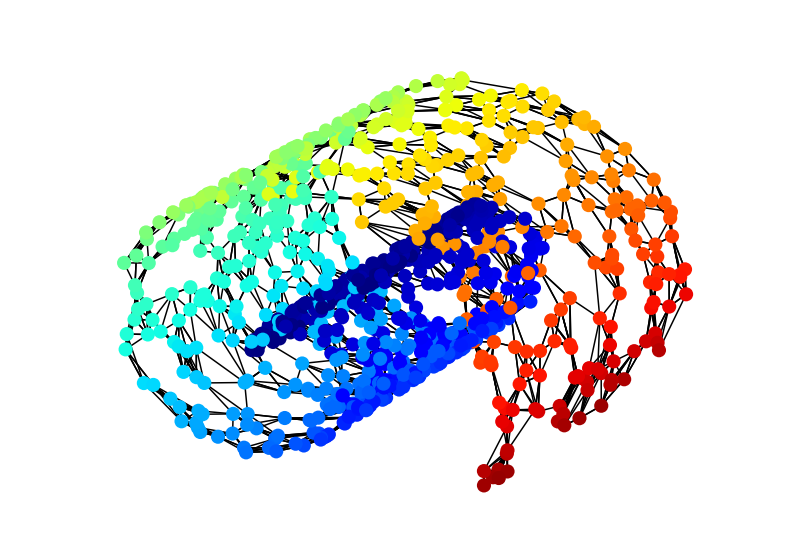

In [15]:
# format X as (n_samples, n_features)
X = np.transpose(X)

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection="3d")

# plot original swiss roll
ax.scatter(X[:,0], X[:,1], X[:,2], c=plt.cm.jet((X[:,0]**2+X[:,2]**2)/100), s=200, lw=0, alpha=1);

# loop through each data point and plot lines connecting nearest neighbors
k = 6 # number of nearest neighbors
knn = nearest_neighbors(X, k)
for i in range(len(X)):
    neighbors = knn[i]
    for j in range(len(neighbors)):
        ax.plot(X[[i, neighbors.astype('int')[j]], 0], 
                X[[i, neighbors.astype('int')[j]], 1], 
                X[[i, neighbors.astype('int')[j]], 2], color='black');

# configure axis settings
ax.axis("off")
ax.set_xlim(np.min(X[:,0]),np.max(X[:,0]))
ax.set_ylim(np.min(X[:,1]),np.max(X[:,1]))
ax.set_zlim(np.min(X[:,2]),np.max(X[:,2]))
plt.show();

The edges connecting each point to its k nearest neighbors are plotted here to show how this graph forms a discrete model for the underlying manifold. The distances are now measured by paths along the graph, and it is visually clear that this is a better approach to learn the fundamental structure of the manifold. We now use the `sklearn.manifold` implementation of isomap and visualize the lower dimensional configuration.   

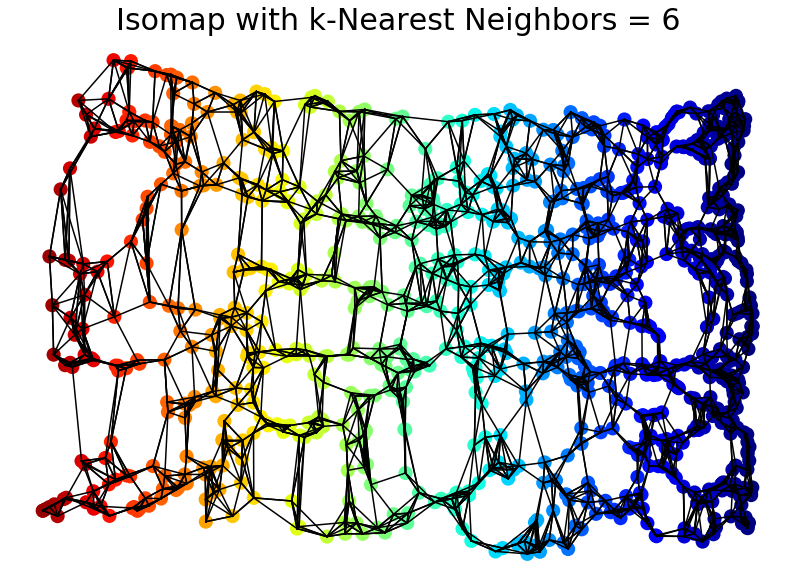

In [16]:
from sklearn.manifold import Isomap
data = X

# apply isomap with k = 6 and output dimension = 2
model = Isomap(n_components=2, n_neighbors=6)
proj = model.fit_transform(data)

# plot the isomap projection
plt.figure(figsize=(14,10))
plt.scatter(proj[:, 0], proj[:, 1], c=plt.cm.jet((X[:,0]**2+X[:,2]**2)/100), s=200, lw=0, alpha=1)

# plot lines connecting the same neighboring points from our original data
for i in range(len(X)):
    neighbors = knn[i]
    for j in range(len(neighbors)):
        plt.plot(proj[[i, neighbors.astype('int')[j]], 0], 
                 proj[[i, neighbors.astype('int')[j]], 1], color='black');
        
plt.title('Isomap with k-Nearest Neighbors = ' + str(k), size=30)
plt.axis("off")
plt.show();

Isomap is able to learn the non-linear structure and produce a two dimensional embedding that unrolls the swiss roll dataset and nicely preserves the pairwise similarities and latent structure. 

### <font color='blue'> Example - Facial Images</font>

We now turn to one of the most common sources of high dimensional data - images. We import the data using `sklearn.datasets`, and we select 30 images per person for ~80 different subjects, where the labels represent each of the targets for image recognition.  

In [17]:
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'

# ignore warnings
import warnings
warnings.filterwarnings('ignore');

(2370, 2914)

(2370, 62, 47)

array(['Alejandro Toledo', 'Alvaro Uribe', 'Andre Agassi', 'Ariel Sharon',
       'Arnold Schwarzenegger', 'Colin Powell', 'David Beckham',
       'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Guillermo Coria', 'Hans Blix',
       'Hugo Chavez', 'Jacques Chirac', 'Jean Chretien',
       'Jennifer Capriati', 'John Ashcroft', 'John Negroponte',
       'Junichiro Koizumi', 'Kofi Annan', 'Laura Bush', 'Lleyton Hewitt',
       'Luiz Inacio Lula da Silva', 'Megawati Sukarnoputri',
       'Nestor Kirchner', 'Recep Tayyip Erdogan', 'Roh Moo-hyun',
       'Serena Williams', 'Silvio Berlusconi', 'Tom Ridge', 'Tony Blair',
       'Vicente Fox', 'Vladimir Putin'], dtype='<U25')

array([ 8,  4, 21, ...,  8, 10,  8])

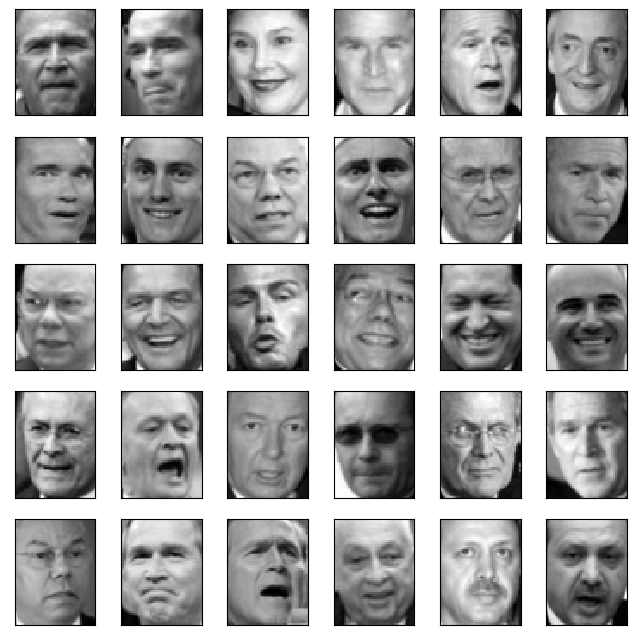

In [36]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape
faces.images.shape
faces.target_names
faces.target

# plot some images
fig, ax = plt.subplots(5, 6, subplot_kw=dict(xticks=[], yticks=[]), figsize=(8,8))
for i, axi in enumerate(ax.flat):
    _ = axi.imshow(faces.data[i].reshape(62, 47), cmap='gray');

Each data point is an image with $62 \times 47 = 2914$ features that can take values representing pixel intensities. We select all the images of a chosen subject, and see if Isomap can meaningfully reduce the very high dimensionality of the image data.

In [37]:
# define a function to plot small images over the data points
from matplotlib import offsetbox

# source: https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html
def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

'George W Bush'

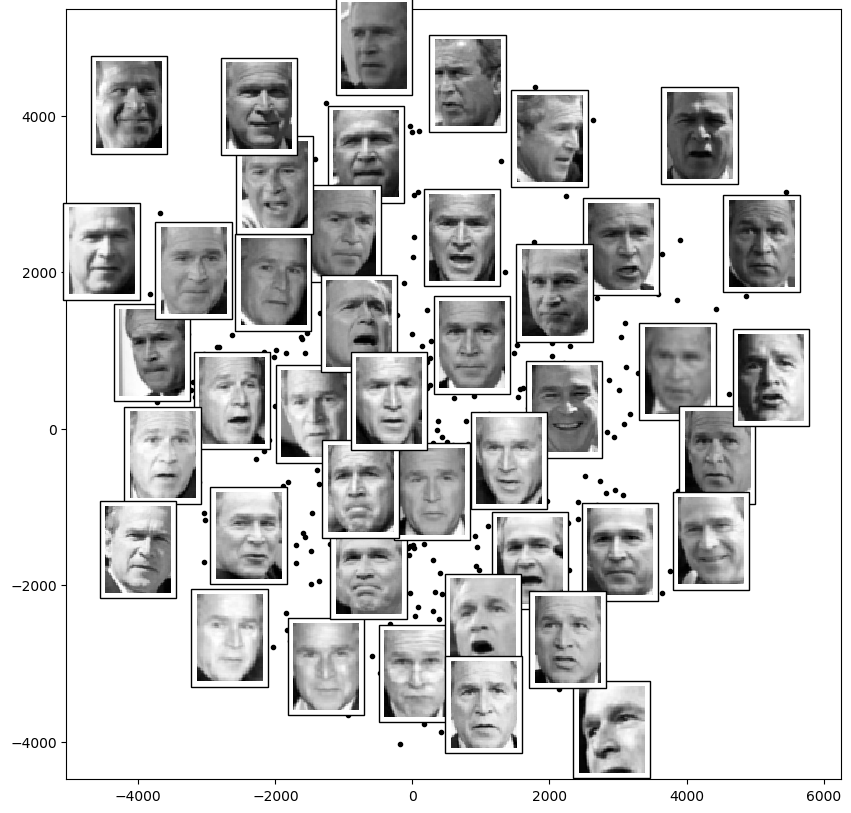

In [38]:
from sklearn.manifold import Isomap
np.random.seed(8888)
fig, ax = plt.subplots(figsize=(10, 10))
data = faces.data[faces.target==8]
images = faces.images[faces.target==8]
faces.target_names[8]
plot_components(data, model=Isomap(n_components=2, n_neighbors=8), images=images, thumb_frac=0.1)

It seems that Isomap does fairly well at preserving some higher dimensional relationships as you can see the images generally get darker and change camera angles while moving across the plane. With only 30 images per person, Isomap will vary substantially in performance across the different subjects.

### <font color='blue'> Example - Object Recognition</font>

We now explore another set of image data, this time the coil-100 dataset with images of 100 random objects. We import one sample image for each object and apply the Isomap algorithm to uncover a two dimensional representation.

In [39]:
import os
import matplotlib.image as img
from skimage.color import rgb2gray
os.getcwd()

def get_sample(path):
    ix = [int(i) for i in np.arange(0, len(os.listdir(path)), 72)]
    object_files = [os.listdir(path)[i] for i in (ix)]

    data = []
    for file in object_files:
        data.append(rgb2gray(plt.imread(path + '/' + file)))
    data = np.array(data)
    images = data
    data = data.reshape(100, 128*128)
    return data, images

path = '/home/llabiod/Bureau/app_ml/Manifold-Learning-master/images/coil-100'
sample_data, sample_images = get_sample(path)
sample_data.shape
sample_images.shape

'/home/llabiod/Bureau/app_ml/Manifold-Learning-master'

(100, 16384)

(100, 128, 128)

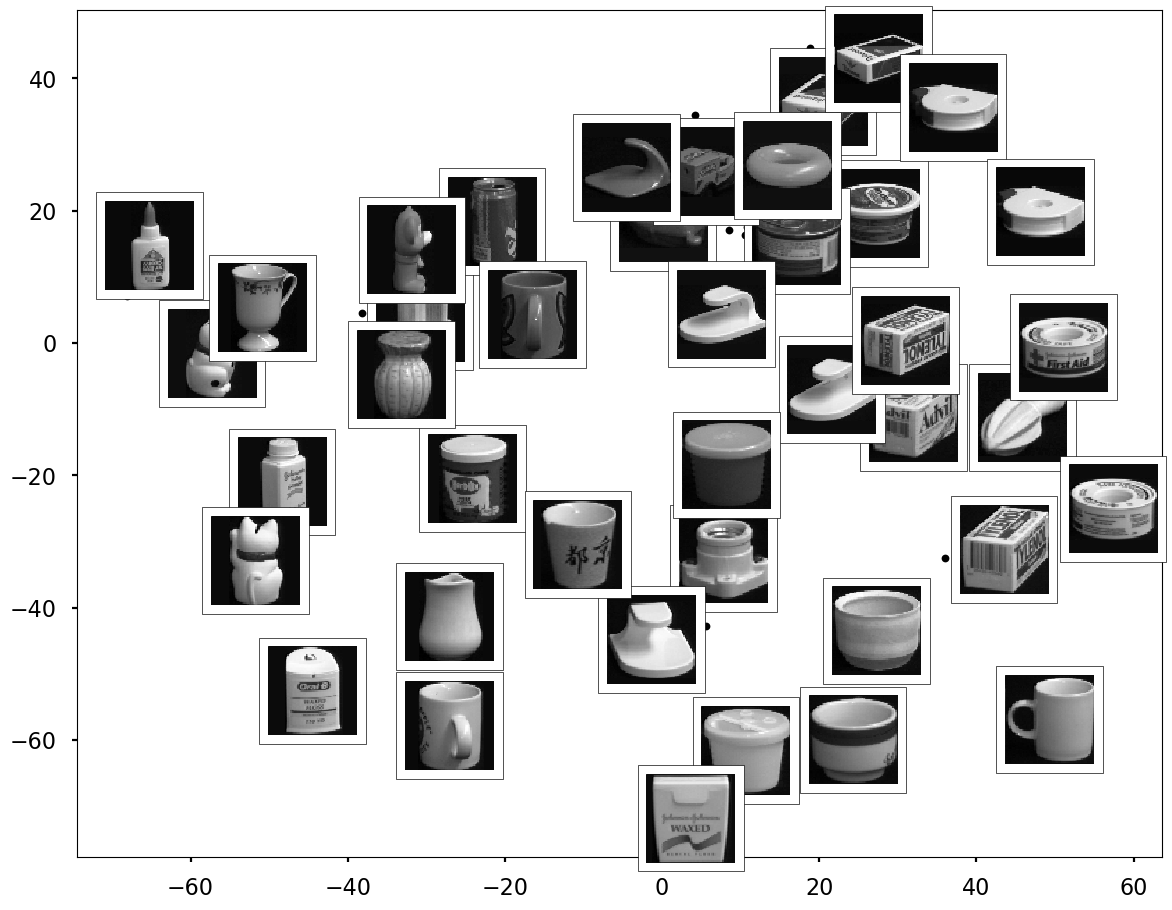

In [40]:
from sklearn.manifold import Isomap
plt.style.use('seaborn-poster')
fig, ax = plt.subplots(figsize=(14, 11))
plot_components(sample_data,
                model=Isomap(n_components=2),
                images=sample_images[:, ::2, ::2],
                thumb_frac=0.07)

Isomap is able to illustrate some interesting underlying structure, such as the clustering of the toy cars, the similarity between the images of coffee mugs and soda cans, and the somewhat surprising patterns that emerge like the semi-clustering of dental floss and hygiene-related products that Isomap was apparently able to uncover. A few more examples of Isomap on the coil-100 dataset are illustrated below.

In [41]:
# read in all the images for a collection of objects
def get_objects(path, keys):
    obj_keys = ['obj' + str(key) + '__' for key in keys]
    data = []
    for obj_key in obj_keys:
        object_files = [x for x in os.listdir(path) if obj_key in x]
        for image in object_files:
            data.append(rgb2gray(plt.imread(path + '/' + image)))

    data = np.array(data)
    images = data
    data = data.reshape(len(keys)*72, 128*128)
    return data, images

In [42]:
# select a set of indices for object images
objects = np.arange(1, 90, 15)
object_data, object_images = get_objects(path, objects)
object_data.shape
object_images.shape

(432, 16384)

(432, 128, 128)

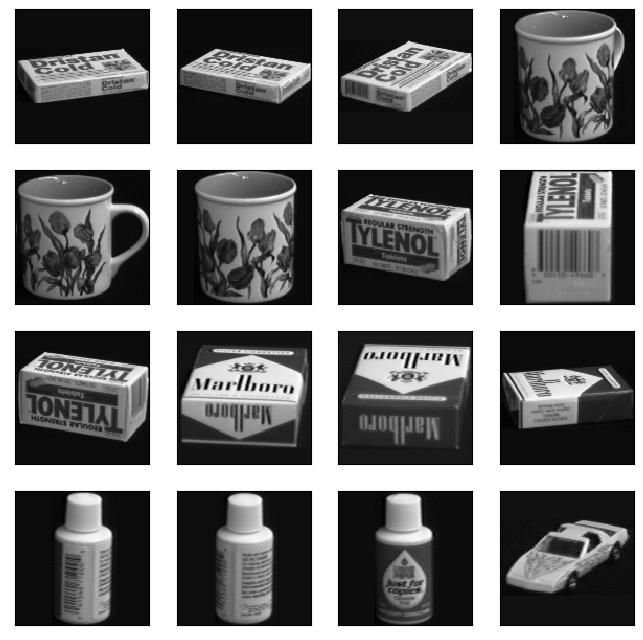

In [25]:
fig, ax = plt.subplots(4, 4, subplot_kw=dict(xticks=[], yticks=[]), figsize=(8,8))
for i, axi in enumerate(ax.flat):
    _ = axi.imshow(object_images[(i+1)*24 - 4], cmap='gray');

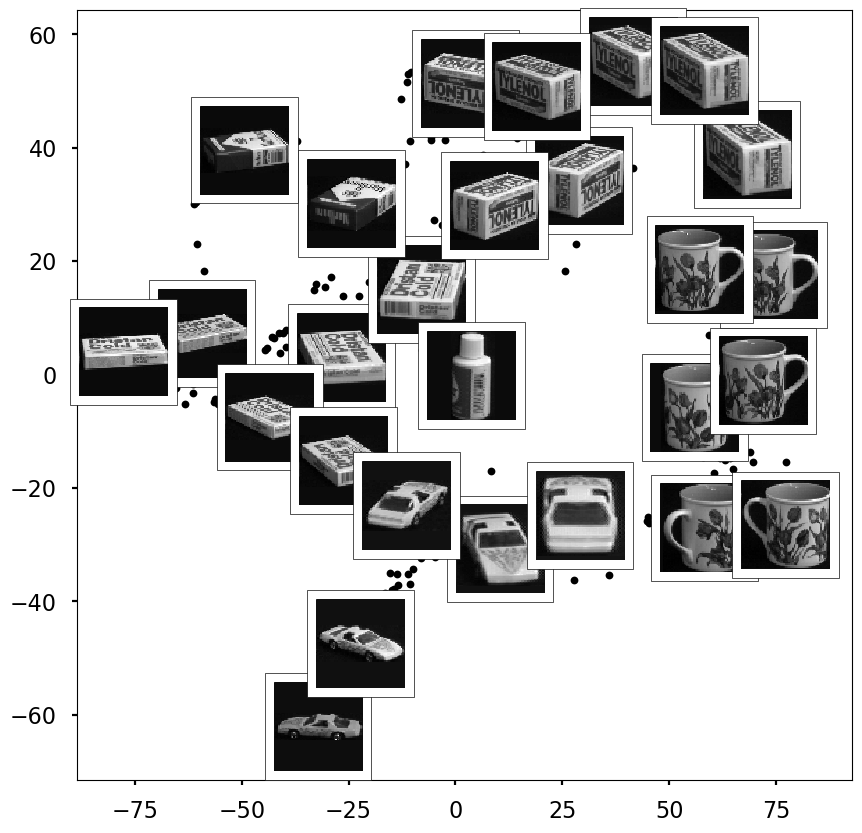

In [26]:
from sklearn.manifold import Isomap
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(object_data, 
                model=Isomap(n_components=2, n_neighbors=15),
                images=object_images[:, ::2, ::2],
                thumb_frac=0.1)

Here the objects are clearly clustered, and manifold learning is especially useful in this case where there's a clear intrinsic dimensionality. The range of different camera angles for each of the objects represents much of the variation in the data, and since these objects seem to have only a few degrees of rotational freedom, this inherent lower dimensional structure can be analyzed.

# [**Local Linear Embedding**]()

Locally linear embedding (LLE) is an intuitive approach based on the idea that small enough neighborhoods will represent patches lying along the manifold, which will then be approximately linear. By fitting locally along the manifold and learning the relationships defined by the intrinsic structure of the data, LLE can learn global, non-linear manifold geometries. <br>
<br>
The idea behind the LLE approach is that we define data points in terms of their local linear relationships. We define data point $x_i$ as a linear combination of its local neighbors, and then we find a lower dimensional embedding that preserves these local linear relationships.

![lle](https://user-images.githubusercontent.com/16658498/56095416-5c6ef800-5ea2-11e9-8ce0-5da013aee4e8.gif)<br>

**figure source**: S. T. Roweis and L. K. Saul. *Nonlinear dimensionality reduction by locally linear
embedding*

### Algorithm Outline (Locally Linear Embedding):
**Input:** Data vectors $\mathbf{x_1}, ..., \mathbf{x_n} \in \mathbb{R^d}$ with parameters k (nearest neighbors) and m (embedding dimension) <br>
**Output:** Lower dimensional embedding vectors $\mathbf{y_i}, ..., \mathbf{y_n} \in \mathbb{R^m}$ with $m < d$
<br>
**Steps**: <br>
1. Find $k$ nearest neighbors for each $x_i$ <br>
2. Solve for weights $W$ to reconstruct each $x_i$ as a linear combination of neighbors <br>
3. Solve for lower dimensional embedding coordinates $y_i \in \mathbb{R}^m$ that preserve local linear relationships

### Step 1: Find k nearest neighbors

First, the parameter k must be defined to specify the number of nearest neighbors we use to linearly model each $x_i$. There's no guaranteed way to know the optimal value of k before applying the algorithm, and different values of k can often drastically affect the performance of LLE. Before going further into the algorithm details, the following example using LLE from the `sklearn.manifold` library shows how locally linear embeddings can vary with the value of k.

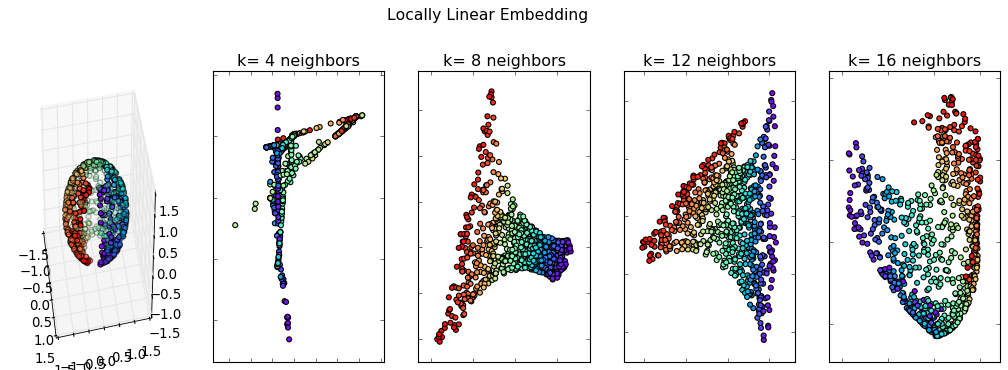

In [2]:
# modified from: https://scikit-learn.org/stable/auto_examples/manifold/plot_manifold_sphere.html
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold
from sklearn.utils import check_random_state

# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";
plt.style.use('classic')
plt.rcParams['figure.facecolor'] = 'white'

n_samples = 1000

# create our sphere
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# sever the poles from the sphere
indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
colors = p[indices]
x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
    np.sin(t[indices]) * np.sin(p[indices]), \
    np.cos(t[indices])

# plot our dataset
fig = plt.figure(figsize=(16, 10))
plt.suptitle("Locally Linear Embedding", fontsize=14)

ax = fig.add_subplot(251, projection='3d')
ax.scatter(x, y, z, c=p[indices], cmap=plt.cm.rainbow)
ax.view_init(40, -10)

sphere_data = np.array([x, y, z]).T

# perform local linear wmbedding 
neighbors = np.arange(4, 20, 4)

for i, neighbor in enumerate(neighbors):
    trans_data = manifold.LocallyLinearEmbedding(neighbor, 2).fit_transform(sphere_data).T
    ax = fig.add_subplot(252 + i)
    plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow);
    ax.xaxis.set_major_formatter(NullFormatter());
    ax.yaxis.set_major_formatter(NullFormatter());
    plt.title('k= ' +str(neighbor) + ' neighbors')
    plt.axis('tight');
plt.show();

It seems that the optimal value of k is somewhere in the middle around 8-12. When using a low value for k, the linear combinations don't have enough neighboring points to accurately convey the structure of the manifold. For really high values of k, the neighborhoods start expanding to include too much of the global spherical structure and the resulting embedding becomes more curved.

## Step 2: Linear Combinations and Optimal Weights

After finding the nearest neighbors, we define the data points $x_i$ in terms of the local linear relationships within the neighborhood. For each $x_i$ in dimension $d$, we reconstruct $x_i$ using a linear combination of its k nearest neighbors. <br>
<br>
**Note**: this linear combination reconstruction is also in dimension $d$.  
<br>
For each point $x_i$ we define a linear combination with the weight coefficient matrix $W \in \mathbb{R}^{k \times n}$ that determines the contribution from each of the nearest neighbors $x_j$. For the weight matrix $W$, we have

$$\mathbf{W} = \begin{bmatrix}
w_{11} & w_{12} & \cdots & w_{1k} \\
w_{21} & w_{22} & \cdots & w_{2k} \\
\vdots & \vdots & \vdots & \vdots \\
w_{n1} & w_{n2} & \cdots & w_{nk}
\end{bmatrix}$$ <br>
and for some $x_i$ we have the linear combination <br>
<br>
$$\sum_{j=1}^{k} w_{ij} x_j = w_{i1} x_{1} + \cdots + w_{ik} x_{k}$$.<br>
Since we'd like to accurately reconstruct $x_i$ as a linear combination, we have the total reconstruction error defined by the following cost function: <br>
<br>
$$\mathcal{E}(W) = \sum_{i} ||x_i - \sum_{j} w_{ij} x_j||^2$$
<br>
This has a residual sum of squares form where we have the error as the Euclidean distance between the original $x_i$ and our nearest neighbors construction. The cost function is a function of the weights since the data $x_i$ is given, and so we minimize this cost function by finding the optimal weights with the lowest reconstruction error.

**Invariance to rotation, scaling, translation:**

By the way we defined the cost function, the optimal weights are invariant to rotation, scaling, and translation, so they reflect intrinsic geometric properties of the original data, as it's possible to imagine applying one of these Euclidean transformations and the local linear relationships remaining unchanged.

### Finding Weights with Constrained Least Squares

The optimal weights are the weights that minimize the cost function: <br>
<br>
$$\mathcal{E}(W) = \sum_{i} ||x_i - \sum_{j} w_{ij} x_j||^2$$
subject to the constraint: <br>
- The rows of the weight matrix sum to one: $\sum_{j} w_{ij} = 1$

Consider error for a particular $x_i$:  <br>
$$
\begin{equation}
\begin{aligned}
\\ \mathcal{E}_i & = ||x_i - \sum_{j} w_{ij} x_j||^2\\
            & = ||(w_{i1} + \cdots + w_{ik}) x_i - \sum_{j} w_{ij} x_j||^2 & \text{(sum of weights = 1)}\\
            & = ||\sum_{j} w_{ij}x_i - \sum_{j} w_{ij} x_j||^2\\
            & = ||\sum_{j} w_{ij} (x_i - x_j)||^2\\
\end{aligned}
\end{equation}$$

Now, let $z_j = x_i - x_j$, and let $\mathbf{z}$ be the k x d matrix where the rows are vectors in $\mathbb{R}^d$: <br>
<br>
$$\mathbf{z} = \begin{bmatrix}
z_{1} = x_{i} - x_{1} \\
z_{2} = x_{i} - x_{2} \\
\vdots & \\
z_{k} = x_{i} - x_{k} 
\end{bmatrix}$$

and $w_i$ is the k x 1 vector with weights for each neighbor of $x_i$. <br>
<br>
$$\mathbf{w_i} = \begin{bmatrix}
w_{i1} \\
w_{i2} \\
\vdots & \\
w_{ik}  
\end{bmatrix}$$

We can rewrite the cost function: <br>
$$
\begin{equation}
\begin{aligned}
\mathcal{E}_i & = ||\sum_{j} w_{ij} (x_i - x_j)||^2\\
            & = ||\sum_{j} w_{ij} z_j||^2\\
            & = ||w_{i1} z_1 + ... + w_{ik} z_k||^2\\
\\
            & = ||w_{i}^{T} z||^2\\
\\
            & = w_{i}^{T} z (w_{i}^{T} z)^{T}\\
\\
            & = w_{i}^{T} z z^{T} w_{i}\\
\end{aligned}
\end{equation}
$$

**Note**: the second to last line follows from $||\mathbf{r}||^2 = \mathbf{r} \mathbf{r}^T$ for a 1 x d row vector $\mathbf{r}$ and $w_{i}^{T} z$ is a 1 x d row vector.

$zz^{T}$ is the local covariance or **Gram matrix** centered at $x_i$, which we denote $G_i$. The Gram matrix is a symmetric, positive semi-definite k x k matrix containing inner products for the local neighborhood of $x_i$. <br>
<br>
$$G_{jk} = (x_i-x_j) \cdot (x_i - x_k)$$ 

$$\mathbf{G_i} = \begin{bmatrix}
(x_i-x_1) \cdot (x_i - x_1) & (x_i-x_1) \cdot (x_i - x_2) & \cdots & (x_i-x_1) \cdot (x_i - x_k) \\
(x_i-x_2) \cdot (x_i - x_1) & (x_i-x_2) \cdot (x_i - x_2) & \cdots & (x_i-x_2) \cdot (x_i - x_k) \\
\vdots & \vdots & \vdots & \vdots \\
(x_i-x_k) \cdot (x_i - x_1) & (x_i-x_k) \cdot (x_i - x_2) & \cdots & (x_i-x_k) \cdot (x_i - x_k)
\end{bmatrix}$$ <br>


We have the final form of the cost function: <br>
<br>
$$\mathcal{E}_i = w_{i}^{T} G_i w_{i}$$ <br>
**Lagrange Multiplier Problem**

We let $\mathbf{1}$ be the k x 1 matrix of all 1's so <br>
$$\mathbf{1}^T w_i = 1$$ <br>
represents our constraint that the weights sum to 1. <br>
<br>
We take partial derivatives and set to zero <br>
<br>
$$\mathcal{L}(w_i, \lambda) = w_{i}^{T} G_i w_{i} - \lambda(\mathbf{1}^T w_i - 1) = 0$$

\begin{equation}
\frac{\partial \mathcal{L}}{\partial w_i} = 2G_i w_i - \lambda \mathbf{1} = 0 \\
\\
\frac{\partial \mathcal{L}}{\partial \lambda} = \mathbf{1}^T w_i - \mathbf{1} = 0
\end{equation}

From the first partial derivative: <br>
$$2G_i w_i = \lambda \mathbf{1} $$

And if $G_i$ is invertible, we have a closed form to compute the optimal weights: <br>
<br>
$$\boxed {w_i = \frac{\lambda}{2} G_{i}^{-1} \mathbf{1}}$$ <br>
where $\lambda$ can be chosen to ensure everything sums to 1.

To avoid finding an explicit inverse, it's often much easier in practice to solve the linear system of equations given by <br>
<br>
$$\boxed{G_{i} \mathbf{w_{i}} = \mathbf{1}}$$ <br>
where each of the k equations is of the form <br>
<br>
$$\sum_{k} G_{j k} w_{ik}=1$$ <br>
and then finally we rescale the weights so that they sum to 1.

**Note:** We find the optimal weights for each point separately

## Step 3: Map to lower dimensional space

We now construct the mapping from each $x_i \in \mathbb{R^d}$ to its lower dimensional representation $y_i \in \mathbb{R^m}$. Since the optimal weights we found have certain invariant properties, we use these weights in this mapping. We define a new cost function with a similar form to the previous one, where we want to minimize reconstruction error:<br>
<br>
$$\phi(Y) = \sum_{i} ||y_i - \sum_{j} w_{ij} y_j||^2$$<br>
This time, the weights are fixed and we find optimal coordinates $y_i$ with the constraints: <br>
- $\sum_i y_i = 0$ (centered on the origin, translational degree of freedom)<br>
- $\frac{1}{N} \sum_i y_i y_i^T = \mathbf{I}$ (unit covariance, rotational degree of freedom) <br>

We rewrite the cost function making use of our constraints: <br>

$$
\begin{aligned} 
\Phi(\mathbf{Y}) &=\sum_{i=1}^{n}\left(y_{i}-\sum_{j} w_{i j} y_{j}\right)^{2} \\
&=\sum_{i=1}^{n} y_{i}^{2}-y_{i}\left(\sum_{j} w_{i j} y_{j}\right)-\left(\sum_{j} w_{i j} y_{j}\right) y_{i}+\left(\sum_{j} w_{i j} y_{j}\right)^{2} \\
&=\mathbf{Y}^{T} \mathbf{Y}-\mathbf{Y}^{T}(\mathbf{w} \mathbf{Y})-(\mathbf{w} \mathbf{Y})^{T} \mathbf{Y}+(\mathbf{w} \mathbf{Y})^{T}(\mathbf{w} \mathbf{Y}) \\
&=(\mathbf{Y}^T-\mathbf{Y}^T\mathbf{w}^T)(\mathbf{Y}-\mathbf{w}\mathbf{Y}) \\
&=\mathbf{Y}^T(\mathbf{I}-\mathbf{w}^T)(\mathbf{I}-\mathbf{w})\mathbf{Y} \\
&=\mathbf{Y}^{T}(\mathbf{I}-\mathbf{w})^{T}(\mathbf{I}-\mathbf{w}) \mathbf{Y} \end{aligned}
$$

Define the m x m matrix $M$:
$$
\begin{aligned} \mathbf{M} &= (\mathbf{I}-\mathbf{w})^{T}(\mathbf{I}-\mathbf{w}) \end{aligned}
$$

and so $$\Phi(\mathbf{Y})=\mathbf{Y}^{T} \mathbf{M} \mathbf{Y}$$

We set up a Lagrange multiplier $\mu$ to impose the constraint $n^{-1} \mathbf{Y}^{T} \mathbf{Y} = \mathbf{I}$ <br>
<br>
$$
\mathcal{L}(\mathbf{Y}, \mu)=\mathbf{Y}^{T} \mathbf{M} \mathbf{Y}-\mu\left(n^{-1} \mathbf{Y}^{T} \mathbf{Y}-1\right)
$$

$$
\begin{array}{c}{\frac{\partial \mathcal{L}}{\partial \mathbf{Y}}=2 \mathbf{M} \mathbf{Y}-2 \mu n^{-1} \mathbf{Y}=0} \\ {\mathbf{M Y}=\frac{\mu}{n} \mathbf{Y}}\end{array}
$$

By the last line, $Y$ is an eigenvector of $M$ and so to minimize 

$$\phi(Y) = Y^{T} M Y$$ <br>
we choose the bottom m+1 eigenvectors (with the smallest eigenvalues) of M as our embedding coordinates, discarding the smallest eigenvector-eigenvalue pair because the first eigenvector will be a unit vector with all equal components by our construction of $M$.

### <font color='blue'> Example - Toy datasets</font>

We first apply LLE to a synthetic dataset for manifold learning to see how the LLE algorithm can learn complex non-linear structures.

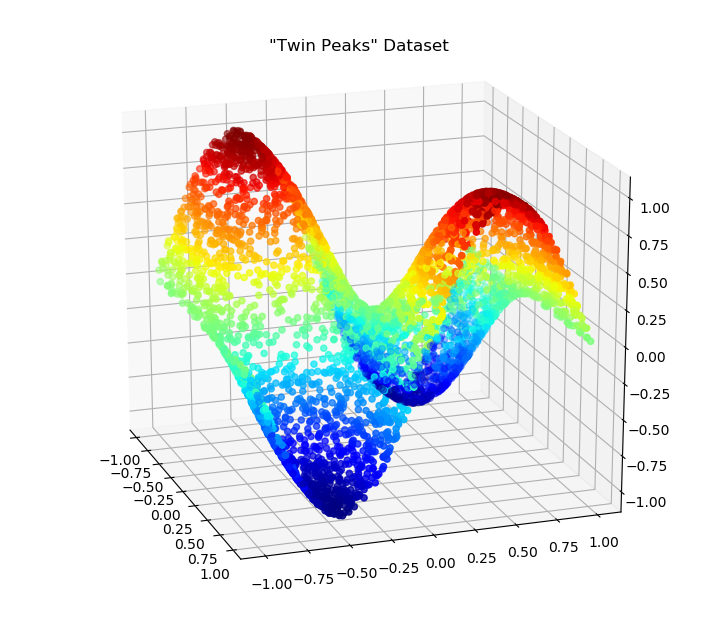

In [3]:
# twin peaks dataset
plt.style.use('default')
n = 5000
param = 1
xy = 1 - 2 * np.random.rand(2, n)
p = np.array([xy[1, :], xy[0, :], param * np.sin(np.pi * xy[0, :]) * np.tanh(3 * xy[1, :])]).T
color = p[:, 2]
fig = plt.figure(figsize = (9, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p[:, 0], p[:, 1], p[:, 2], c=color, cmap=plt.cm.jet)
plt.title('"Twin Peaks" Dataset', size=12)
ax.view_init(20, -19);

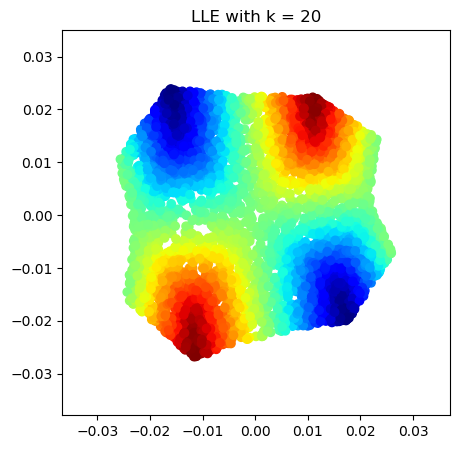

In [4]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components = 2, n_neighbors=20) 
X_reduced = lle.fit_transform(p)
fig = plt.figure(figsize = (5, 5))
plt.title('LLE with k = 20', size=12)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color, cmap=plt.cm.jet);

LLE performs fairly well on this highly non-linear dataset. In general the 2-dimensional embedding keeps close instances in $\mathbb{R^3}$ close together and further instances further apart. The areas of the original twin peaks dataset with the greatest curvature are not represented as well and this leads to the irregular, high density red and blue areas. <br>
<br>
Another synthetic dataset that can be challenging for manifold learning and LLE is the following construction of connected, clusters of data.

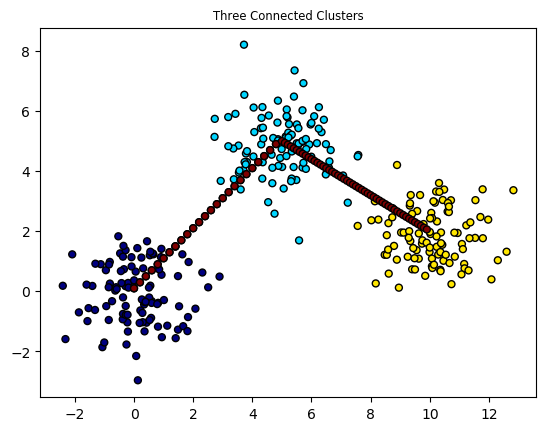

In [5]:
from sklearn.datasets import make_blobs
plt.title("Three Connected Clusters", fontsize='small')
X1, Y1 = make_blobs(n_samples=300,n_features=2, centers=[[0,0], [5,5], [10,2]])
t = np.arange(0,1,0.02)
l1 = np.array((t*5, t*5)).reshape(50,2)
l2 = np.hstack((np.array(5+5*t).reshape(-1,1),np.array(5+t*-3).reshape(-1,1)))
X = np.vstack((X1, l1, l2))
Y = np.vstack((Y1.reshape(-1,1), np.repeat(3,100).reshape(-1,1)))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y.reshape(400,),
            s=25, edgecolor='k', cmap=plt.cm.jet);

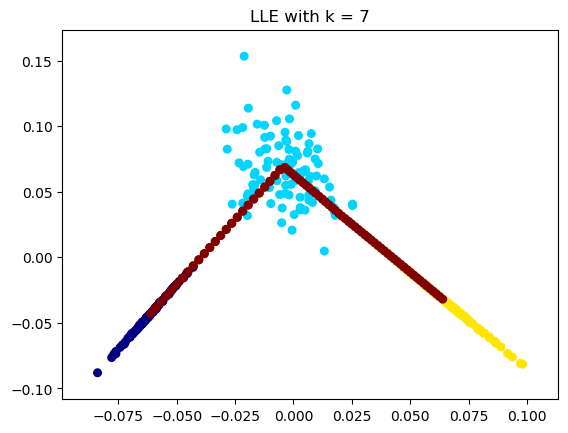

In [6]:
k = 7
lle = LocallyLinearEmbedding(n_components = 2, n_neighbors=k) 
X_reduced = lle.fit_transform(X)
plt.title('LLE with k = ' + str(k), size=12)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y.reshape(400,), s=30, cmap=plt.cm.jet);

# [**Laplacian Eigenmaps/Spectral Embedding**]()

First, we begin with a restatement of the manifold learning setting: assume we have data $x_{1}, x_{2}, \cdots, x_{n} \in \mathbb{R}^{N}$ that are sampled from an unknown manifold $M \subset \mathbb{R}^{N}$. Our goal is to construct a lower dimensional embedding of the data, where we find a transformation of the original data to the corresponding lower dimensional points $y_{1}, y_{2}, \cdots, y_{n} \in \mathbb{R}^{m}$ with $m < N$. <br>
<br>
We first attempt to model the continuous, underlying manifold by constructing a graph $G = (V, E)$ out of the discrete data points. We let the data points $x_{1}, x_{2}, \cdots, x_{n}$ be the nodes of our graph, and we connect neighboring points with edges. This graph will then contain information about the structure of the manifold. The local relationships and intrinsic geometry of the manifold are reflected in the graph edges, which are given weights that indicate similarity between data points. <br>
<br>
So far this is very similar to other manifold learning algorithms, where the manifold is first assumed and the neighborhood graph is constructed. The distinguishing aspect of Laplacian Eigenmaps/Spectral Embedding is the use of the Laplacian Matrix (or Graph/Discrete Laplacian), a discrete analog of the Laplacian operator. We use the eigenvalue decomposition of the Laplacian Matrix $L$, and by utilizing some of the associated properties of the Laplacian Matrix, we are able to find an optimal, lower dimensional embedding that preserves the assumed manifold structure of the data.

### Algorithm Outline: 
**Input:** Data vectors $\mathbf{x_1}, ..., \mathbf{x_n} \in \mathbb{R^p}$ with parameters k (nearest neighbors) and m (embedding dimension)<br>
**Output:** Lower dimensional embedding vectors $\mathbf{y_i}, ..., \mathbf{y_n} \in \mathbb{R^m}$ with m < P
<br>
**Steps**: <br>
1. kNN graph: construct nearest neighbors graph and the adjacency matrix $W \in \mathbb{R}^{n \times n}$<br>
2. Graph Laplacian (Laplacian Matrix): use degree matrix $D$ and adjacency matrix to compute the Laplacian $\mathbf{L} = D - W$ <br>
3. Eigenvector Embedding:  use the first m eigenvectors $f_1, ..., f_m$ (with the m smallest nonzero eigenvalues) of the Laplacian matrix to map each $x_i$ to lower dimensional vectors $y_i \in \mathbb{R}^m$

## Step 1: kNN graph and adjacency matrix

Given our input $\mathbf{x_1}, ..., \mathbf{x_n} \in \mathbb{R^p}$, we have two common options to find the nearest neighbors for each data point. The first option is to use an $\varepsilon$-neighborhood, where we use the set of all points within some neighborhood centered at $x_i$: <br>
<br>
$$\mathbf{B}(x_i) = \left\{ x_{j} \in \mathbb{R}^{p} \ | \ \ d(x_{i}, x_{j}) < \varepsilon \right\}$$
<br>
There is no fixed amount of points in any given neighborhood and as long as points are within $\varepsilon$ of $x_i$ they are considered to be neighbors. The following figure illustrates an open neighborhood (does not include the boundary) around the point p:

![title](https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Neighborhood_illust1.png/256px-Neighborhood_illust1.png)

The second option is to use the k nearest neighbors for each data point. We can simply compute all the pairwise distances in the ambient space using the standard Euclidean (or any other) metric, then taking the k nearest data points for each $x_i$. In this case there is a fixed number (k) of points within each neighborhood.

Next, define the kNN or adjacency graph $$G = ({V, E)}$$ <br>
Let every data point $x_i$ be a node $v_i \in V$ with edges $e_{ij}$ connecting the node $x_i$ to $x_j$ if $x_j$ is a neighbor of $x_i$.

Given this graph, we define similarity weights for the edges. Just like we have two options for defining the neighborhoods, we also have two options for defining the edge weights of the adjacency graph. 

1.) **Simple approach**: given data points $x_i$, $x_j$ define the corresponding edge weights by <br>
<br>
$$
\ w_{i,j} = \begin{cases} 
      1 & x_j \ \text{is a nearest neighbor of $x_i$} \\
      0 & otherwise \\ 
   \end{cases}
\\ $$

2.) **Heat kernel approach**: given data points $x_i$, $x_j$ define the corresponding edge weights by <br>
<br>
$$
\ w_{i,j} = \begin{cases} 
      e^{-\frac{\left\|\mathbf{x}_{i}-\mathbf{x}_{j}\right\|^{2}}{t}} & x_j \ \text{is a nearest neighbor of $x_i$} \\
      0 & otherwise \\ 
   \end{cases}
\\ $$

By using the simple approach, all of the neighbors of $x_i$ are weighted equally, but with the heat kernel approach the neighbors can have different weights. We let $w_{i,j}$ be the entries of the adjacency or similarity matrix $W \in \mathbb{R}^{n\times n}$.

### Discrete (Graph) Laplacian
So far we have only mentioned the Laplacian in the general, continuous case. The underlying form of the Laplacian operator needs to be modified in our discrete case, where we now have a finite graph whose nodes represent the input data points. 

We would still like for the Laplacian to be an operator in the discrete case, such that it takes functions as inputs and maps them to other functions. However, in our case these functions will be defined on a discrete domain - the finite set of vertices $V$ for the graph $G$. Therefore, we can assume the discrete Laplacian operator $(\Delta \phi)(v)$ acts on a function $\phi : V \rightarrow R$, where $\phi$ is a function defined on the vertices of the graph (our data points). 

We also use finite differences as the discrete analog of the derivative, and so instead of using derivatives to compare the local regions in a continuous domain, we use the finite differences to compare the local neighborhoods of our discrete graph.

For a function $\phi : V \rightarrow R$ defined on the vertices of a graph $G$, we define the discrete Laplacian operator (graph Laplacian) as: <br>
<br>
$$
(\Delta \phi)(v_i)= -\sum_{v_j} W_{ij}[\phi(v_i)-\phi(v_j)]
$$
<br>
where we sum over all $v_j$ that are in the neighborhood of $v_i$, with the similarity weight for edge $e_{ij}$ given as $W_{ij}$.<br>

Just like the continuous case, the discrete Laplacian will have lower values when $\phi(v_i)$ is greater than its surrounding neighborhood (the maximum of f) and will have higher values when $\phi(v_i)$ is lower than its surrounding neighborhood (the minimum of f). 

### Constructing the Laplacian Matrix

We represent the discrete Laplacian operator as a matrix. Our function $\phi$ can be written as a column vector, and $\Delta \phi$ is the product of this column vector and the Laplacian matrix $L$.
<br>

\begin{equation}
\underset{n\times 1}{\Delta \phi} =  \underset{n\times n}{L} \times 
\underset{n\times 1}{\phi}
\end{equation}
<br>
$(\Delta \phi)(v_i)$ is then the i'th entry of this product vector.

There's a simple formula to compute the Laplacian matrix $L$ from the constructed neighborhood graph, which involves the degree and adjacency matrices. Each node $v_i$ has an associated degree, which gives a measure of the node's connectivity. The degree for a given node is equal to the number of edges connected to it. We compute the diagonal degree matrix $D$, which has diagonal entries $D_{ii} = deg(v_i)$, by taking the column sums (or row sums, since W is symmetric) of $W$:

$$
D_{i i}=\sum_{j} W_{i j}
$$

Then the Laplacian matrix $L$ is also symmetric, and we have $L \in \mathbb{R}^{n \times n}$ with $L = D - W$

The following example shows a calculation of the Laplacian matrix for a simple graph:
![title](https://user-images.githubusercontent.com/16658498/59164486-eb7b4380-8ad2-11e9-977d-f997501688dc.PNG)

## Step 3: Eigenvector Decomposition and Embedding

Given the Laplacian matrix $L$, we define the eigenvectors of $L$ as the vectors $f_i \in \mathbb{R}^{n}$ that satisfy: 

$$
L f_i=\lambda_i f_i
$$

with corresponding eigenvalues $\lambda_i$ and $f_i \neq 0$. Since $L$ is symmetric and positive semi-definite, we are guaranteed real, non-zero eigenvalues.

When evaluating a potential embedding transformation, a reasonable standard would be that the function preserves local distances - i.e. inputs that are close in the original space remain close after applying the transformation. Let the transformation be defined by $\phi (x_{i}) = y_i$, which maps inputs $x_i \in \mathbb{R}^p$ to the lower dimensional $y_i \in \mathbb{R}^m$. We might formulate a cost or objective function that reflects our local distance preserving criteria: <br>
<br>
$$\sum_{i j}\left(\phi(x_{i})-\phi(x_{j})\right)^{2} W_{i j}$$ 
<br>
Since $W_{i j} = 0$ if $x_{i}$ and $x_{j}$ aren't neighbors, we are effectively summing the difference of the function values for points within local neighborhoods. The $W_{ij}$ term penalizes this difference when $x_{i}$ and $x_{j}$ are highly similar. <br>
<br>
We write this objective function in terms of the Laplacian matrix by observing the following:<br>
<br>
$$
\begin{aligned} \sum_{i, j}\left(y_{i}-y_{j}\right)^{2} W_{i j} &=\sum_{i, j}\left(y_{i}^{2}+y_{j}^{2}-2 y_{i} y_{j}\right) W_{i j} \\ &=\sum_{i} y_{i}^{2} D_{i i}+\sum_{j} y_{j}^{2} D_{j j}-2 \sum_{i, j} y_{i} y_{j} W_{i j}=2 \mathbf{y}^{T} L_{\mathbf{y}} \end{aligned}
$$
<br>
which implies that <br>
$$
\frac{1}{2} \sum_{i, j}\left(y_{i}-y_{j}\right)^{2} W_{i j}=\mathbf{y}^{T} L \mathbf{y}
$$

To define an optimal embedding, given this criteria and some fixed input data that produces the Laplacian matrix $L$, we need to find $y$ that minimizes the objective function: <br>
<br>
$$
\underset{\mathbf{y}}{\operatorname{argmin}} \mathbf{y}^{T} L \mathbf{y} = \underset{\mathbf{y}}{\operatorname{argmin}} \langle L \mathbf{y}, \mathbf{y}\rangle
$$
<br>
We impose an additional constraint: $y^{T} D y=1$ to fix the scaling and another constraint $y^{T} D \mathbf{1} = 0$, where $\mathbf{1}$ is the vector of all ones, to eliminate the trivial solution where $y = 1$ and eigenvalue $\lambda = 0$. 

This leaves us with a generalized eigenvalue problem, in which case the first m non-zero eigenvectors of $L$ solves this optimization problem and defines our optimal embedding. We apply the following transformation with the eigenvectors: <br>
<br>
$$\mathbf{x}_{i} \rightarrow\left(\mathbf{f}_{1}(i), \ldots, \mathbf{f}_{m}(i)\right)$$
<br>
To map the input $x_i$ into $\mathbb{R}^{m}$, we let the output $y_i$ have these m components where each component is the i'th entry of the respective eigenvectors.

### <font color='blue'> Example - Brown Corpus Text Data</font>

We now work with another common source of high dimensional data: text analysis. Using the `nltk` library we can import the Brown corpus, which contains many published text documents classified into different categories. 

In [29]:
import nltk
path = 'home/llabiod/nltk_data/corpora'
from nltk.corpus import brown
nltk.download('brown')
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

brown.categories()

[nltk_data] Downloading package brown to /home/llabiod/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

We first convert the data to a vectorized form by using word counts for sentences in these selected categories - ('news', 'fiction', 'reviews') - and applying the tf-idf transformer from sklearn.

In [30]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from IPython.core.pylabtools import figsize
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";


In [31]:
sent_dict = {}
brown_categories = ['news', 'fiction', 'reviews']
for category in brown_categories:
    sent_dict[category] = np.array(brown.sents(categories=category))

In [32]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
stop_words = set(stopwords.words('english')) 

# define functions for stopwords
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [33]:
train_text = [' '.join(sent) for sent in brown.sents(categories=brown_categories)]
text = remove_stopwords(train_text)

from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 6000,
                             ngram_range=(1, 3))
vectorizer.fit(train_text)
feature_vec = vectorizer.fit_transform(train_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=6000, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=True).fit(feature_vec)

In [35]:
feature_data = []
for category in sent_dict:
    cat_data = [' '.join(sent) for sent in sent_dict[category]]
    feature_data.append(tf_transformer.transform(
        vectorizer.transform(cat_data)))

df = [np.array(arr.todense()) for arr in feature_data]

category_labels = []
for category in brown_categories:
    category_labels.append(np.repeat(category, len(
        np.array(brown.sents(categories=category)))))

labels = np.hstack((category_labels))
final_df = np.vstack((df))

final_df.shape
labels.shape

(10623, 6000)

(10623,)

We now have a very high dimensional dataset with thousands of features, each indicating how frequently the different sentences in the genre categories contain certain words. Using spectral embedding, the data can be reduced to a lower dimension.

In [36]:
import pandas as pd
data = pd.DataFrame(final_df)
data['label'] = labels
data = data.loc[np.random.randint(0, len(data), size=1500)]
data.head()
data.shape
final_data = data.drop(['label'], axis=1)
final_labels = np.array(data['label'])

,0,1,2,3,4,5,6,7,8,9,...,5991,5992,5993,5994,5995,5996,5997,5998,5999,label
3751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,news
5225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fiction
7066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fiction
360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,news
3463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,news


(1500, 6001)

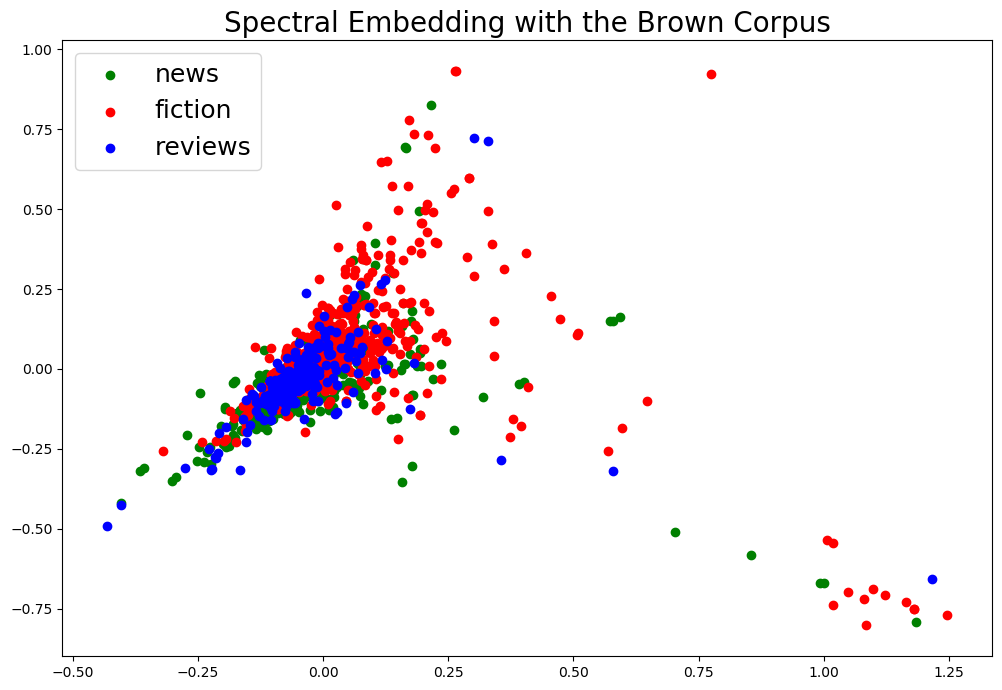

<Figure size 640x480 with 0 Axes>

In [37]:
from sklearn.manifold import SpectralEmbedding
# apply spectral embedding with output dimension = 2
model = SpectralEmbedding(n_components=2, n_neighbors=45)
proj = model.fit_transform(final_data)

# plot the spectral embedding
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'

fig = plt.figure(figsize=(12,8))
colors = {'news': 'green', 'religion': 'purple', 'fiction': 'red', 'government': 'black',
         'reviews': 'blue'}

plt.scatter(proj[data['label'] == 'news', 0], proj[data['label'] == 'news', 1], c='green', label='news')
plt.scatter(proj[data['label'] == 'fiction', 0], proj[data['label'] == 'fiction', 1], c='red', label='fiction')
plt.scatter(proj[data['label'] == 'reviews', 0], proj[data['label'] == 'reviews', 1], c='blue', label='reviews')
plt.title('Spectral Embedding with the Brown Corpus', size=20)
plt.legend(loc='upper left', fontsize=18)
plt.show()
plt.savefig('brown_corpus_laplacian.png');

The results seem to show that the algorithm was able to uncover some intrinsic structure that distinguishes news from fiction, with the reviews left somewhere in the middle. This differentiation makes sense intuitively as reviews are more likely to be opinionated than printed news, but still containing some measure of truth and reference to current events. 

Finally, we also show the spectral embedding with 3 components.

Text(0.5, 0.98, 'Spectral Embedding of the Brown Corpus')

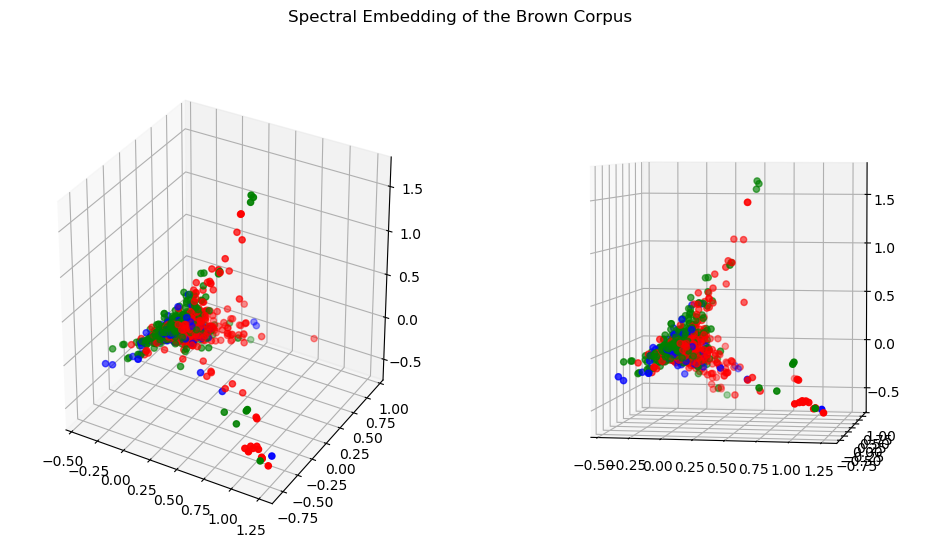

In [38]:
from sklearn.manifold import SpectralEmbedding
%matplotlib inline
# apply spectral embedding with output dimension = 3
model = SpectralEmbedding(n_components=3, n_neighbors=45)
proj = model.fit_transform(final_data)

# plot the spectral emedding
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
colors = {'news': 'green', 'religion': 'purple', 'fiction': 'red', 'government': 'black',
          'reviews': 'blue'}
ax.scatter(proj[:, 0], proj[:, 1], proj[:, 2],
           c=data['label'].apply(lambda x: colors[x]))

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(proj[:, 0], proj[:, 1], proj[:, 2],
           c=data['label'].apply(lambda x: colors[x]))
ax.view_init(4, -80)
plt.suptitle('Spectral Embedding of the Brown Corpus')
plt.show()